In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

# Image preprocessing

## Find a circle in an image

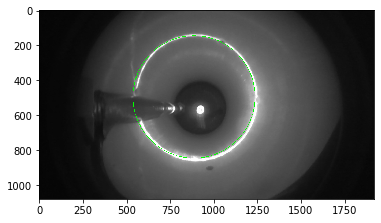

In [89]:
train_path = os.getcwd() + '/dataset/training_set/Hole/'

img = cv2.imread(train_path + '3.jpg', 0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 50,
                           param1 = 50, param2 = 100, minRadius = 50, maxRadius = 0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    # cv2.circle(image, center_coordinates, radius, color, thickness)
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(cimg)

In [77]:
circles

In [65]:
# x
circles[0][0][0]

886

In [66]:
# y
circles[0][0][1]

480

In [67]:
# r
circles[0][0][2]

350

In [78]:
h = 880
k = 480
r = 350

## Select 20 points on the circumference

In [90]:
train_path = os.getcwd() + '/dataset/training_set/Hole/'

img = cv2.imread(train_path + '3.jpg', 0)

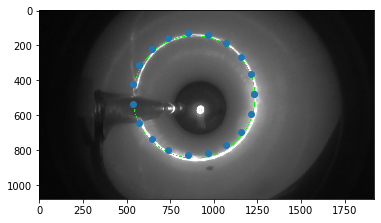

In [91]:
from math import pi, cos, sin
from random import random

def point(h, k, r, i):
    theta = i * 2 * pi     
    return h + cos(theta) * r, k + sin(theta) * r

num = np.linspace(0, 1, 20)
points = [point(h, k, r, i) for i in num]

plt.imshow(cimg)
plt.scatter(*zip(*points))

In [92]:
points

[(1230.0, 480.0),
 (1211.0360345952222, 593.6448142216392),
 (1156.1991782887378, 694.9744494413837),
 (1071.4318553428495, 773.008267391885),
 (965.9199204992797, 819.2900930787656),
 (851.0972290846837, 828.8045725523344),
 (739.4066013714607, 800.5206643292702),
 (642.9514499309907, 737.503368735596),
 (572.1841870777289, 646.5815875629758),
 (534.7735438090472, 537.6081065982569),
 (534.7735438090472, 422.3918934017432),
 (572.1841870777289, 313.41841243702424),
 (642.9514499309905, 222.49663126440407),
 (739.4066013714605, 159.47933567072994),
 (851.0972290846836, 131.19542744766557),
 (965.9199204992796, 140.70990692123434),
 (1071.4318553428493, 186.99173260811494),
 (1156.1991782887376, 265.0255505586159),
 (1211.0360345952222, 366.3551857783607),
 (1230.0, 479.9999999999999)]

## Crop a image with its center at the selected points

In [93]:
def imcrop(img, x, y, width): 
    x1 = int(x - width/2)
    y1 = int(y - width/2)
    x2 = x1 + width
    y2 = y1 + width
    if x1 < 0 or y1 < 0 or x2 > img.shape[1] or y2 > img.shape[0]:
        img, x1, x2, y1, y2 = pad_img_to_fit(img, x1, x2, y1, y2)
    return img[y1:y2, x1:x2, :]

def pad_img_to_fit(img, x1, x2, y1, y2):
    img = np.pad(img, ((np.abs(np.minimum(0, y1)), np.maximum(y2 - img.shape[0], 0)),
               (np.abs(np.minimum(0, x1)), np.maximum(x2 - img.shape[1], 0)), (0,0)), mode = "constant")
    y1 += np.abs(np.minimum(0, y1))
    y2 += np.abs(np.minimum(0, y1))
    x1 += np.abs(np.minimum(0, x1))
    x2 += np.abs(np.minimum(0, x1))
    return img, x1, x2, y1, y2

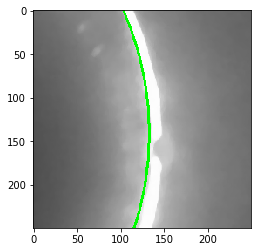

In [94]:
crop = imcrop(np.array(cimg), points[0][0], points[0][1], width = 250)
plt.imshow(crop)

In [95]:
crop.shape

(250, 250, 3)

In [96]:
crop_list = []
for i in range(20):
    crop_list.append(imcrop(cimg, points[i][0], points[i][1], width = 250))

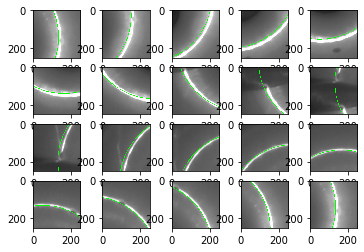

In [97]:
f, axarr = plt.subplots(4,5)
for i in range(4):
    for j in range(5):
        axarr[i,j].imshow(crop_list[i*5 + j])

In [28]:
np.array(crop_list).shape

(20, 250, 250, 3)

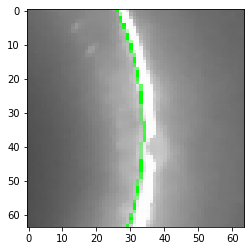

In [98]:
shape = (100, 100)
crop_0 = cv2.resize(crop_list[0], shape)
plt.imshow(crop_0)